# Wine Quality (Vino Tinto)
**Descripción:** Este conjunto de datos registra 11 propiedades fisicoquímicas de muestras de vino tinto (como acidez, pH y contenido de alcohol).  
**Clase a Predecir:** Su objetivo es clasificar el vino según su calidad (valores entre 3 y 8). Este es un problema de clasificación multiclase.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
np.random.seed(SEED)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

print("Vista del Dataset")
print(df.head())
print(df.tail())

print("Información genereal de DataFrame")
print(df.info())


Vista del Dataset
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

In [17]:
#Anális del dataset y visulización de datos nulos
print('Dimensiones del dataset: ', df.shape)

#Visualizar cuántos nulas hay 
print(df.isnull().sum())


Dimensiones del dataset:  (1599, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


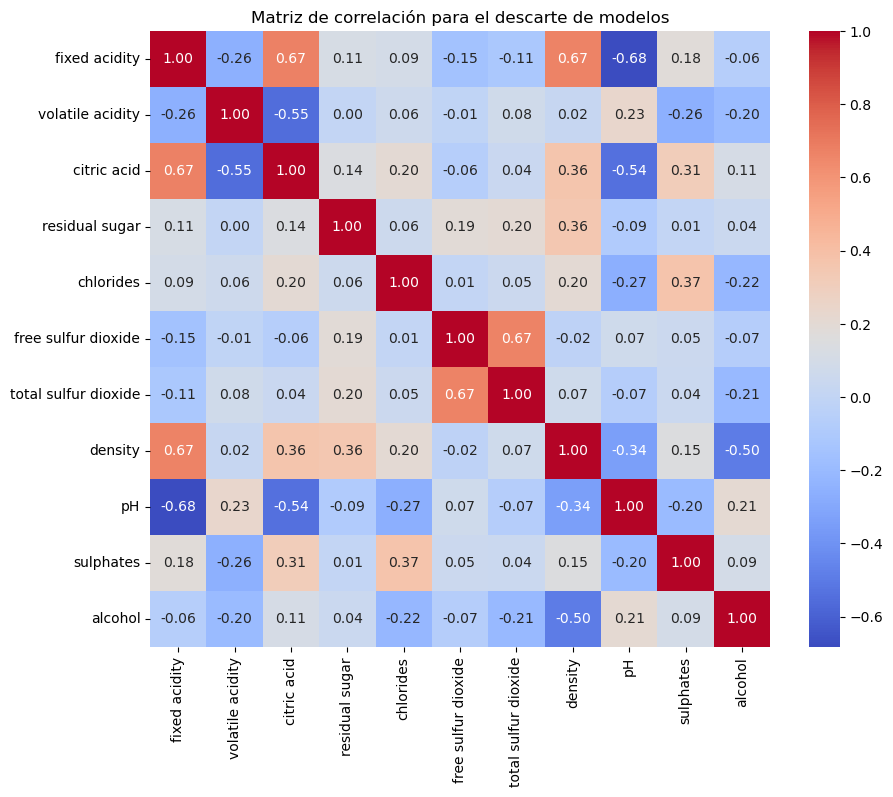

In [18]:
# Separar variables predictoras (X) y variable objetivo (y)
x = df.drop('quality', axis=1)   # Todas las columnas excepto 'quality'
y = df['quality']                # Solo la columna 'quality'

plt.figure(figsize=(10,8))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Matriz de correlación para el descarte de modelos")
plt.show()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [20]:
def evaluar_modelo(modelo, X_tr, X_ts, y_ts):
    """Entrena y evalúa un modelo y devuelve la precisión."""
    modelo.fit(X_tr, y_train)
    pred = modelo.predict(X_ts)
    return accuracy_score(y_ts, pred)

resultados = {}

# 1. Naïve Bayes (Modelo con suposición violada)
nb_model = GaussianNB()
resultados['Naïve Bayes (NB)'] = evaluar_modelo(nb_model, X_train, X_test, y_test)

# 2. KNN CON Escalar (Modelo Ajustado)
knn_scaled_model = KNeighborsClassifier(n_neighbors=5)
resultados['KNN CON Escalar'] = evaluar_modelo(knn_scaled_model, X_train_scaled, X_test_scaled, y_test)

# 3. Regresión Logística (Modelo lineal robusto a correlación)
log_model = LogisticRegression(solver='liblinear', random_state=SEED)
resultados['Regresión Logística'] = evaluar_modelo(log_model, X_train_scaled, X_test_scaled, y_test) 
# Logística se beneficia del escalado para la optimización

# 4. Árbol de Decisión (Modelo no paramétrico, insensible a escala)
tree_model = DecisionTreeClassifier(random_state=SEED)
resultados['Árbol de Decisión'] = evaluar_modelo(tree_model, X_train, X_test, y_test) 

# Mostrar resultados
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Precisión'])
df_resultados = df_resultados.sort_values(by='Precisión', ascending=False)
print("\n--- Precisión de los Modelos ---")
print(df_resultados.set_index('Modelo'))


--- Precisión de los Modelos ---
                     Precisión
Modelo                        
Árbol de Decisión     0.572917
KNN CON Escalar       0.570833
Regresión Logística   0.568750
Naïve Bayes (NB)      0.541667


c:\Anaconda3\envs\proyectos\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.datasets import make_classification 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

modelo_final = DecisionTreeClassifier(random_state=SEED, max_depth=5)
modelo_final.fit(X_train, y_train)

y_pred = modelo_final.predict(X_test)

# Reporte de desempeño
print("=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.74      0.67       195
           6       0.53      0.54      0.53       200
           7       0.50      0.36      0.42        61
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.54      0.57      0.55       480



c:\Anaconda3\envs\proyectos\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Anaconda3\envs\proyectos\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Anaconda3\envs\proyectos\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


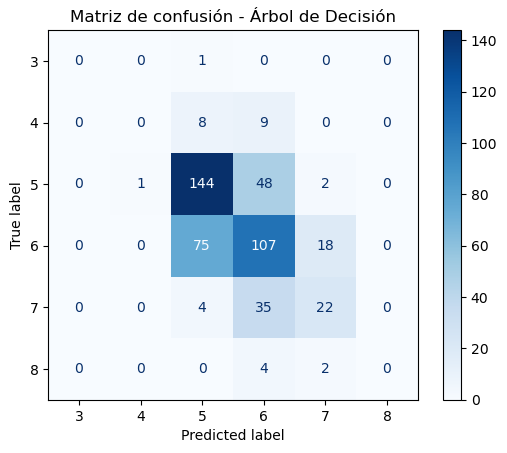

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_final.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Árbol de Decisión")
plt.show()


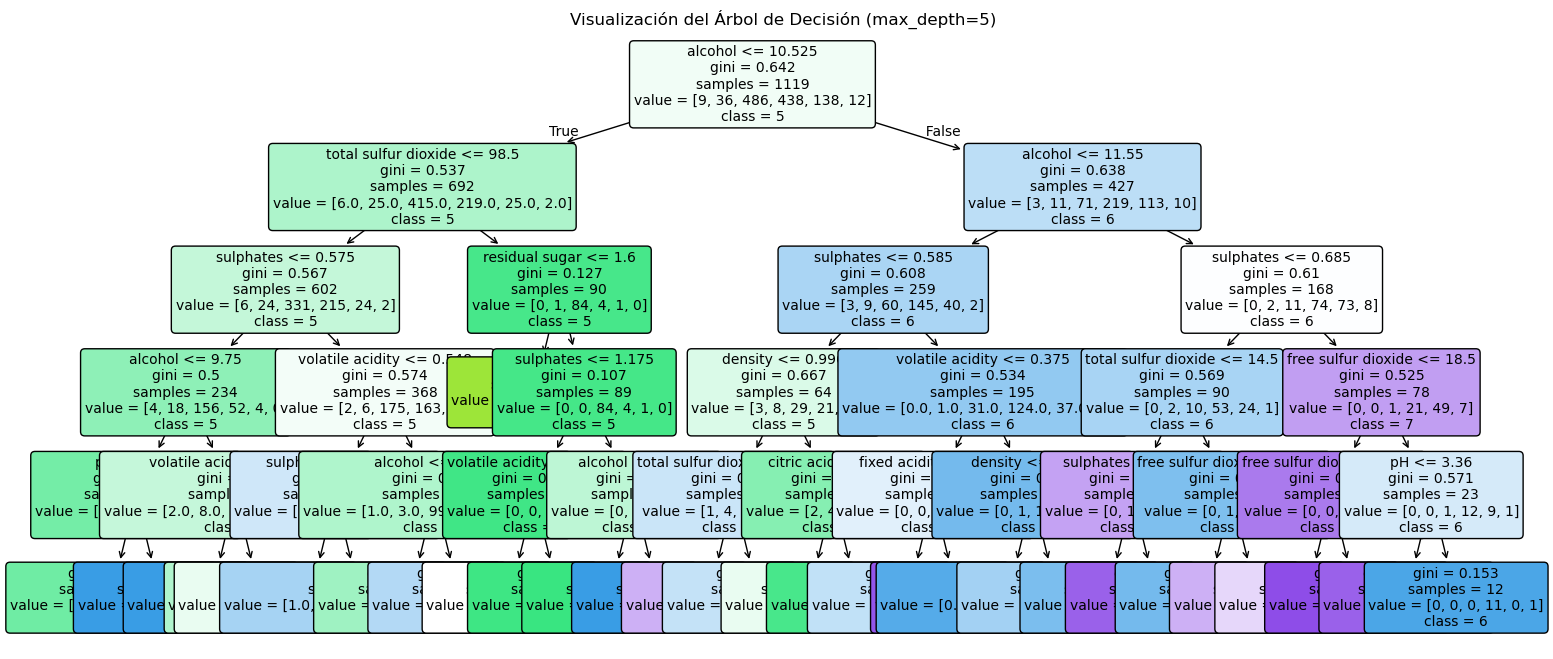

In [28]:
plt.figure(figsize=(18,8))
plot_tree(modelo_final, feature_names=x.columns, class_names=[str(c) for c in modelo_final.classes_],
          filled=True, rounded=True, fontsize=10)
plt.title("Visualización del Árbol de Decisión (max_depth=5)")
plt.show()


In [29]:
arbol_completo = DecisionTreeClassifier(random_state=SEED)
arbol_completo.fit(X_train, y_train)
print("Precisión sin poda:", arbol_completo.score(X_test, y_test))


Precisión sin poda: 0.5729166666666666


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejor accuracy (validación cruzada): 0.6068
Mejores hiperparámetros encontrados:
{'max_depth': 4, 'min_samples_leaf': 10}

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.66      0.64       195
           6       0.50      0.61      0.55       200
           7       0.46      0.21      0.29        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.26      0.25      0.25       480
weighted avg       0.52      0.55      0.53       480



c:\Anaconda3\envs\proyectos\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Anaconda3\envs\proyectos\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Anaconda3\envs\proyectos\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


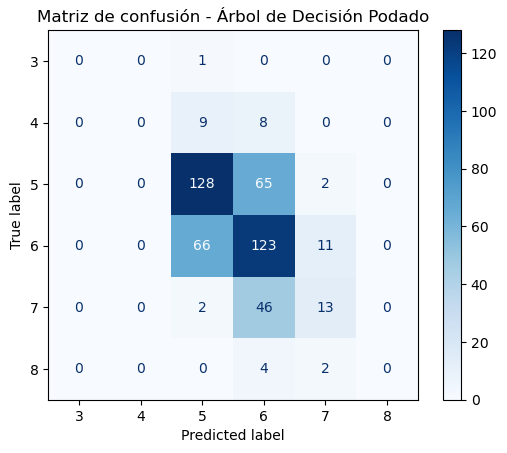


=== Reglas del Árbol Podado ===
|--- alcohol <= 10.53
|   |--- total sulfur dioxide <= 98.50
|   |   |--- sulphates <= 0.57
|   |   |   |--- alcohol <= 9.75
|   |   |   |   |--- class: 5
|   |   |   |--- alcohol >  9.75
|   |   |   |   |--- class: 5
|   |   |--- sulphates >  0.57
|   |   |   |--- volatile acidity <= 0.55
|   |   |   |   |--- class: 6
|   |   |   |--- volatile acidity >  0.55
|   |   |   |   |--- class: 5
|   |--- total sulfur dioxide >  98.50
|   |   |--- sulphates <= 1.05
|   |   |   |--- density <= 1.00
|   |   |   |   |--- class: 5
|   |   |   |--- density >  1.00
|   |   |   |   |--- class: 5
|   |   |--- sulphates >  1.05
|   |   |   |--- class: 5
|--- alcohol >  10.53
|   |--- alcohol <= 11.55
|   |   |--- sulphates <= 0.58
|   |   |   |--- density <= 1.00
|   |   |   |   |--- class: 6
|   |   |   |--- density >  1.00
|   |   |   |   |--- class: 5
|   |   |--- sulphates >  0.58
|   |   |   |--- volatile acidity <= 0.38
|   |   |   |   |--- class: 6
|   |   |   |

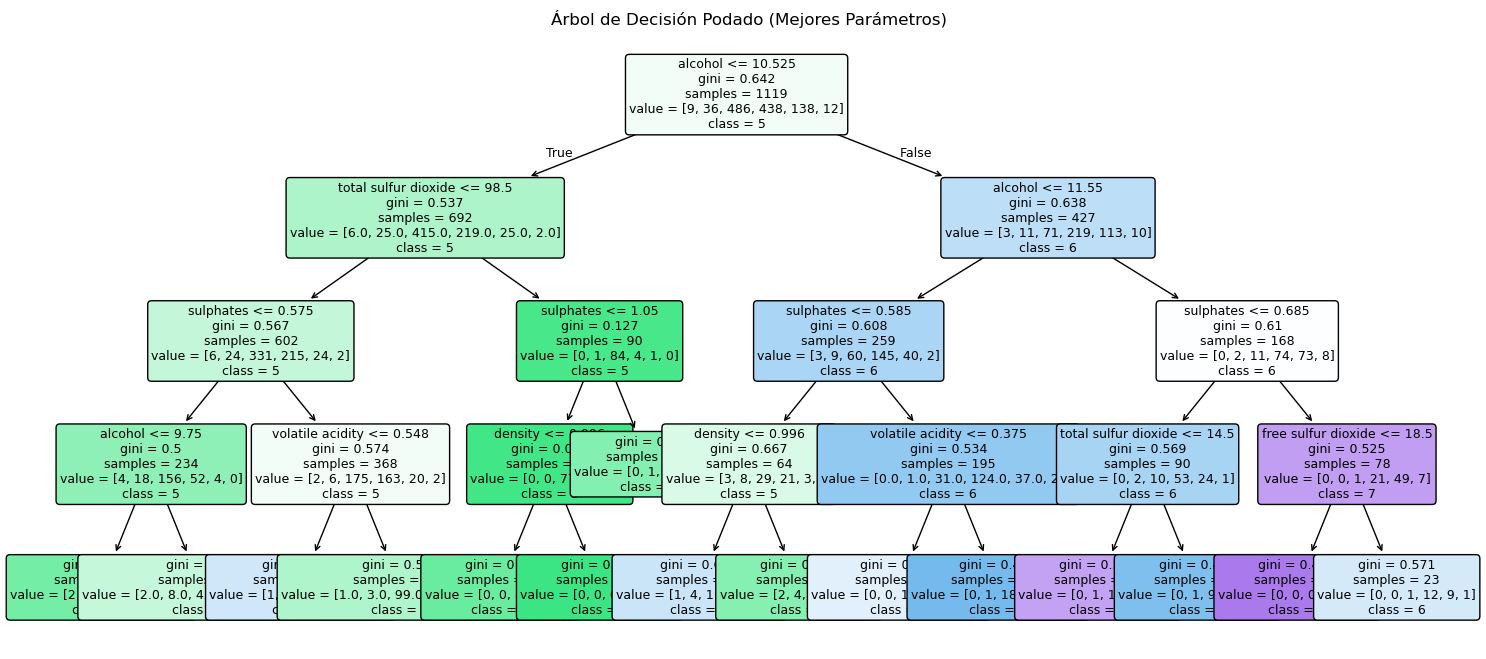

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_leaf': [1, 2, 5, 10, 20]
}


grid = GridSearchCV(
    DecisionTreeClassifier(random_state=1),
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)


print(f"Mejor accuracy (validación cruzada): {grid.best_score_:.4f}")
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)


best_tree = grid.best_estimator_
y_pred_best = best_tree.predict(X_test)

print("\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred_best))


cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_tree.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de confusión - Árbol de Decisión Podado")
plt.show()


rules = export_text(best_tree, feature_names=list(X_train.columns))
print("\n=== Reglas del Árbol Podado ===")
print(rules)


plt.figure(figsize=(18,8))
plot_tree(best_tree,
          feature_names=X_train.columns,
          class_names=[str(c) for c in best_tree.classes_],
          filled=True, rounded=True, fontsize=9)
plt.title("Árbol de Decisión Podado (Mejores Parámetros)")
plt.show()
